In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt, colors, cm
from four_level_transmons.plotting import plotComplexMatrixHinton, plotSignalAndSpectrum
import scipy.signal as scps

2022-09-16 18:25:17.323689: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 18:25:17.323712: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# levels of the model
qubit_levels = (5, 5)
level_labels_transmon = ["|0,0\\rangle", "|0,1\\rangle", "|1,0\\rangle", "|1,1\\rangle"]
for i in range(len(level_labels_transmon), max(qubit_levels)):
    level_labels_transmon.append("leakage")
level_labels = []
level_labels_with_leakage = []
level_labels_short = []
for i in range(qubit_levels[0]):
    for j in range(qubit_levels[1]):
        if i > 3 or j > 3:
            level_labels_with_leakage.append("leakage")
            level_labels_short.append(None)
        else:
            s = f"${level_labels_transmon[i]},{level_labels_transmon[j]}$"
            level_labels.append(s)
            level_labels_with_leakage.append(s)
            level_labels_short.append(f"{i},{j}")
level_labels_transmon = [f"${x}$" for x in level_labels_transmon]

stateEnergies = [
    (-42106.231698993695, '0,0'),
    (4499114771.5089655, '0,1'),
    (5000711781.167839, '1,0'),
    (8748800295.696821, '0,2'),
    (9496990718.064747, '1,1'),
    (9703804156.096302, '2,0'),
    (12748799935.48425, '0,3'),
    (13747449747.302649, '1,2'),
    (14089562795.824818, '3,0'),
    (14213807653.516392, '2,1'),
    (17746706110.335068, '1,3'),
    (18438398982.764374, '2,2'),
    (18614913260.709934, '3,1'),
    (22441469946.98455, '2,3'),
    (22859083368.21059, '3,2'),
    (26850428582.564625, '3,3')
]

# all energy transitions
items = sorted(stateEnergies, key=lambda x: x[0])
transitions = []
for i in range(len(items)):
    for j in range(len(items)):
        if i != j:
            #print(i, j)
            E = items[j][0] - items[i][0]
            if E > 0:
                transitions.append((E, items[i][1] + " - " + items[j][1]))

In [3]:
time, signal = np.load('/home/user/Schreibtisch/results/4-level qubit/Fourier basis 5 levels, 1000ns/13-0 freqs/unity/signal_t1_after.npy')

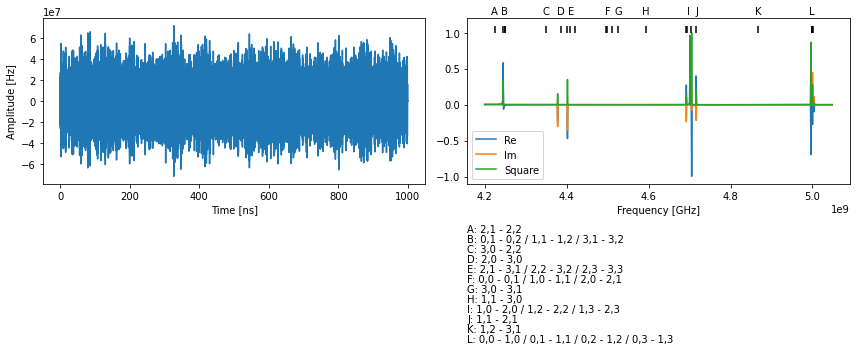

In [6]:
plotSignalAndSpectrum(time, real=signal, filename=None, spectralThreshold=1e-4, states=transitions,
                      spectralCutoff=(4.2e9, 5.05e9))

In [8]:
def fidelity(A, B):
    return np.abs(np.trace(A @ np.conjugate(B.T)) / A.shape[0]) ** 2

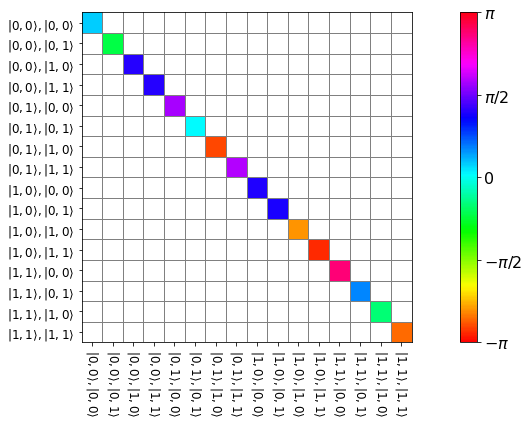

In [9]:
Udrift = np.load('/home/user/Schreibtisch/single frequencies/empty/propagator_before.npy')
plotComplexMatrixHinton(Udrift, maxAbsolute=1, xlabels=level_labels, ylabels=level_labels, gridColour="gray",
                        filename='/home/user/empty_propagator.svg', colourMap='hsv')

In [ ]:
U_f = [None] * 10
Udrive_f = [None] * 10
for i in range(10):
    U_f[i] = np.load(f'/home/user/Schreibtisch/single frequencies/CZ t1/f{i}/propagator_before.npy')
    Udrive_f[i] = np.conjugate(Udrift.T) @ U_f[i]
    #plotComplexMatrixHinton(U_f[i], maxAbsolute=1, xlabels=level_labels, ylabels=level_labels, gridColour="gray",
    #                        filename=f'/home/user/Schreibtisch/CZ single frequencies/t1/propagators/drift+drive_{i}.svg', colourMap='hsv')

In [ ]:
plotComplexMatrixHinton(Udrive_f[3], maxAbsolute=1, xlabels=level_labels, ylabels=level_labels, gridColour="gray",
                        filename='/home/user/single_frequency_propagator_b.svg', colourMap='hsv')

In [ ]:
fidelities = []
for i in range(10):
    for j in range(i + 1, 10):
        U = Udrive_f[i] @ Udrive_f[j]
        fidelities.append((i, j, fidelity(U, np.eye(16))))

fidelities.sort(key=lambda x: x[2])
for x in list(reversed(fidelities)):
    print(x[2], x[0], x[1])

In [ ]:
A = np.eye(16)
for U in Udrive_f:
    A = A @ U
plotComplexMatrixHinton(A, maxAbsolute=1, xlabels=level_labels, ylabels=level_labels, gridColour="gray",
                        filename=None, colourMap='hsv')